# 1.Préparation et exploration des données
## Charger et prétraiter les images 


tf version : 2.20.0
Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
Class Names : ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


Data is loaded, normalized & optimized


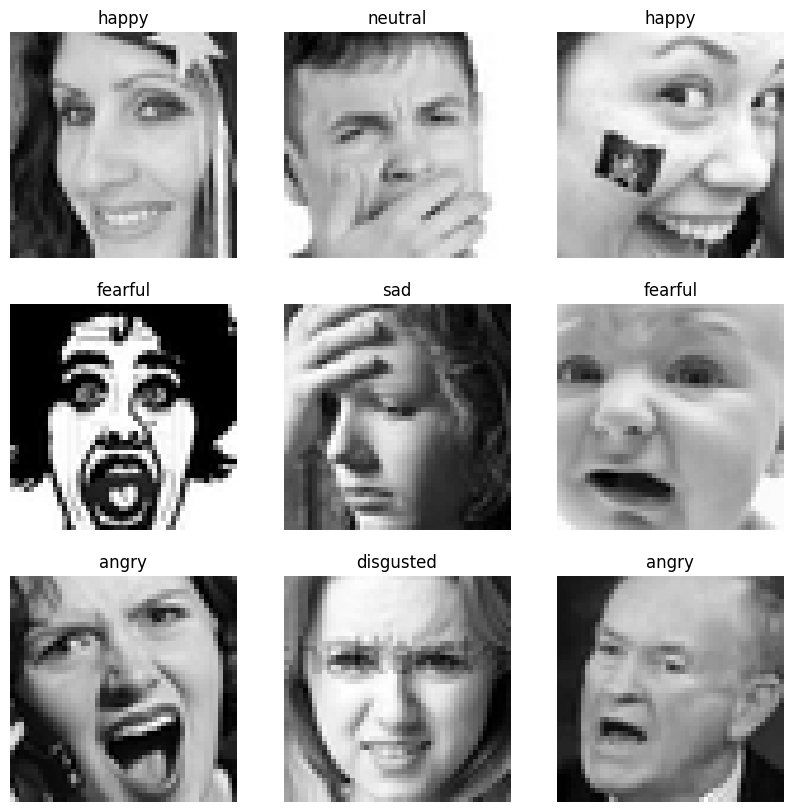

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 

print(f"tf version : {tf.__version__}")

# Def : Chemins & Parametres --> r\ pour que Windows gere bien les "\"
# --------------------------------------------------------------------
data_dir = r"C:\Users\ezzya\OneDrive\Desktop\Simplon Maghreb\Briefs\D-tection-d-motions-Faciales---CNN-Haar-Cascade-\Data_Kaggle_Emotional_Detection"
train_data = data_dir + r"\train"       # Sur Colab, après avoir décompressé 'data.zip' : DATA_DIR = "/content/data"
test_data = data_dir + r"\test"

# Datasets Parameters
BATCH_SIZE = 32     # Valeurs typiques 16, 32, 64, 128
IMG_HEIGHT = 48     #images du DATASET: 48 * 48
IMG_WIDTH = 48
AUTOTUNE = tf.data.AUTOTUNE     # optimiser le chargement

# loading data 
# ------------
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_data,
    label_mode = 'int',      # labels : int (0,1,2,...)
    color_mode = 'grayscale',
    image_size = (IMG_HEIGHT,IMG_WIDTH),
    batch_size = BATCH_SIZE
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_data,
    label_mode = 'int',
    color_mode = 'grayscale',
    image_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE
)

class_names = train_dataset.class_names
print(f"Class Names : {class_names}")


# Pretraitement & Optimisation
# ----------------------------

# Normalisation
normalized_layer = layers.Rescaling(1./255)     # Couche Keras :  [0,255] --> [0,1]

# Normalisation ---> train/test Datasets
train_dataset = train_dataset.map(lambda x, y : (normalized_layer(x),y))
test_dataset = test_dataset.map(lambda x, y: (normalized_layer(x),y))

# Optimiser les performances
# cache() : garde les donnees en memoire
# prefetch() : pré-charge les lots  de donnees 
train_dataset = train_dataset.cache().prefetch(buffer_size = AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size = AUTOTUNE)

print("\n")
print("Data is loaded, normalized & optimized")

# Verfi fonctionnement  - lot d'images : 
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):    #seul batch
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().reshape(48,48), cmap = 'gray')
        plt.title(class_names[labels[i]])
        plt.axis("off")
        
plt.show()


Classes trouvées : [***'angry'***, ***'disgust'***, ***'fear'***, ***'happy'***, ***'neutral'***, ***'sad'***, ***'surprise'***]

* --- Statistiques des Classes (Train) ---
    * Classe **'angry'**: 3995 images
    * Classe **'disgust'**: 436 images
    * Classe **'fear'**: 4097 images
    * Classe **'happy'**: 7215 images
    * Classe **'neutral'**: 4965 images
    * Classe **'sad'**: 4830 images
    * Classe **'surprise'**: 3171 images
        * **Total**: 28709 images

# 2. Entrainement du CNN